In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

def generate_telecom_data(n_samples=3000):
    # 1. Generate random features
    data = {
        'customerID': [f'{i:04d}-ConnectX' for i in range(n_samples)],
        'gender': np.random.choice(['Male', 'Female'], n_samples),
        'SeniorCitizen': np.random.choice([0, 1], n_samples, p=[0.84, 0.16]),
        'Partner': np.random.choice(['Yes', 'No'], n_samples),
        'tenure': np.random.randint(1, 73, n_samples), # Months stayed
        'PhoneService': np.random.choice(['Yes', 'No'], n_samples, p=[0.9, 0.1]),
        'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples, p=[0.34, 0.44, 0.22]),
        'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples, p=[0.55, 0.24, 0.21]),
        'MonthlyCharges': np.random.uniform(18, 118, n_samples)
    }
    
    df = pd.DataFrame(data)
    
    # 2. Engineer the 'Churn' Logic (Target Variable)
    # We want the data to have patterns! 
    # People with Month-to-month contracts and Fiber Optic (expensive) are MORE likely to churn.
    # People with Long tenure are LESS likely to churn.
    
    churn_prob = np.zeros(n_samples)
    
    # Base probability
    churn_prob += 0.15 
    
    # Contract influence
    churn_prob[df['Contract'] == 'Month-to-month'] += 0.30
    churn_prob[df['Contract'] == 'One year'] -= 0.10
    churn_prob[df['Contract'] == 'Two year'] -= 0.20
    
    # Tenure influence (Longer tenure = lower churn)
    churn_prob -= (df['tenure'] / 72) * 0.25
    
    # Internet influence (Fiber is often complained about due to price)
    churn_prob[df['InternetService'] == 'Fiber optic'] += 0.15
    
    # Add random noise
    churn_prob += np.random.normal(0, 0.05, n_samples)
    
    # Clip probabilities to 0-1 and generate labels
    churn_prob = np.clip(churn_prob, 0, 1)
    df['Churn'] = np.random.binomial(1, churn_prob)
    df['Churn'] = df['Churn'].map({1: 'Yes', 0: 'No'})
    
    return df

# Generate and save
df = generate_telecom_data()
print("Dataset Generated Successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset Generated Successfully!
Shape: (3000, 10)


,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,Contract,MonthlyCharges,Churn
0,0000-ConnectX,Male,0,Yes,1,Yes,Fiber optic,Month-to-month,87.894239,No
1,0001-ConnectX,Female,0,No,51,Yes,DSL,One year,68.960189,No
2,0002-ConnectX,Male,0,Yes,5,Yes,Fiber optic,One year,36.268893,No
3,0003-ConnectX,Male,0,No,13,Yes,Fiber optic,Two year,30.322101,No
4,0004-ConnectX,Male,0,Yes,19,Yes,DSL,Month-to-month,23.976661,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       3000 non-null   object 
 1   gender           3000 non-null   object 
 2   SeniorCitizen    3000 non-null   int64  
 3   Partner          3000 non-null   object 
 4   tenure           3000 non-null   int64  
 5   PhoneService     3000 non-null   object 
 6   InternetService  3000 non-null   object 
 7   Contract         3000 non-null   object 
 8   MonthlyCharges   3000 non-null   float64
 9   Churn            3000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 234.5+ KB


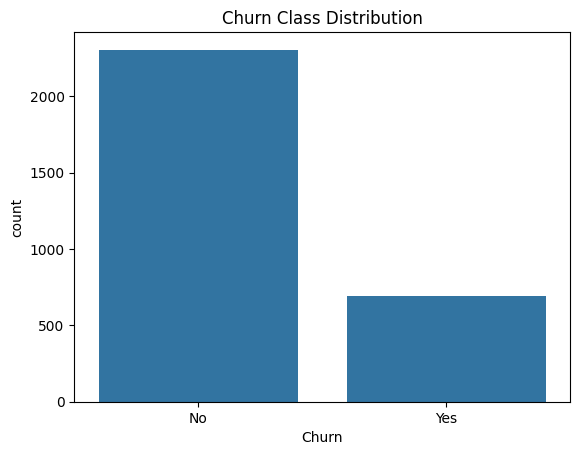

Churn
No     0.768333
Yes    0.231667
Name: proportion, dtype: float64


In [3]:
# Check the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title("Churn Class Distribution")
plt.show()

# Calculate exact percentage
print(df['Churn'].value_counts(normalize=True))

/tmp/ipython-input-3321575884.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='red', shade=True, label='Churn: Yes', ax=axes[1])
/tmp/ipython-input-3321575884.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], color='green', shade=True, label='Churn: No', ax=axes[1])


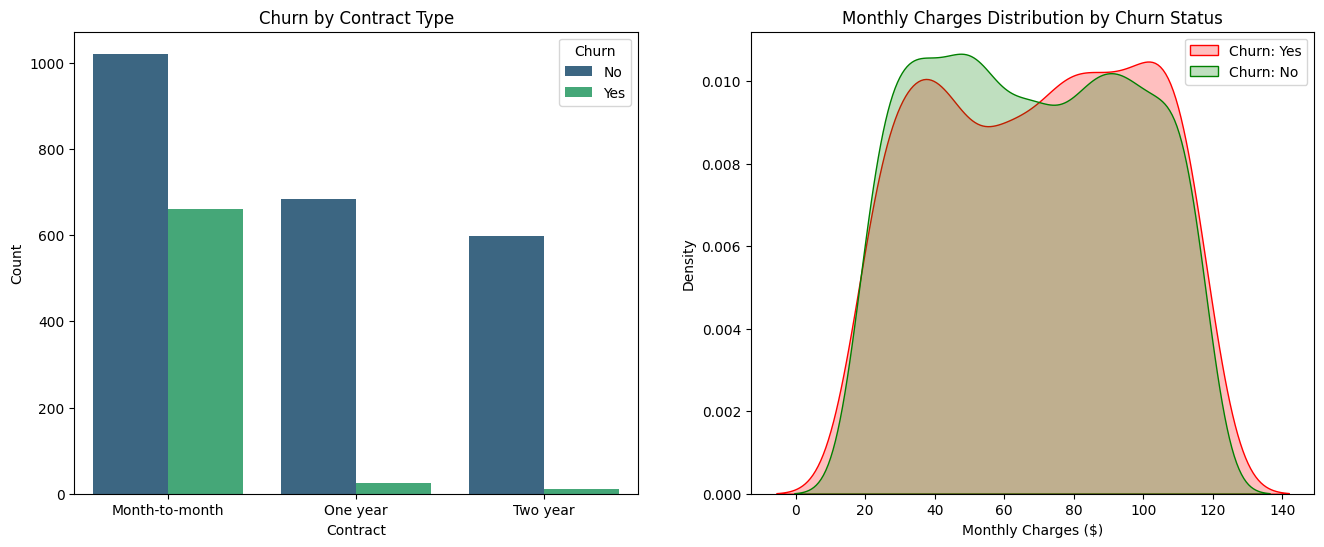

In [4]:
# Set up the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Churn rate by Contract Type
# We look at the count of churners inside each contract category
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Churn by Contract Type')
axes[0].set_xlabel('Contract')
axes[0].set_ylabel('Count')

# Plot 2: Churn by Monthly Charges (Distribution)
# KDE Plot shows the "shape" of charges for Churners vs Non-Churners
sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='red', shade=True, label='Churn: Yes', ax=axes[1])
sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], color='green', shade=True, label='Churn: No', ax=axes[1])
axes[1].set_title('Monthly Charges Distribution by Churn Status')
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].legend()

plt.show()

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,InternetService,Contract,MonthlyCharges,Churn
0,0000-ConnectX,Male,0,Yes,1,Yes,Fiber optic,Month-to-month,87.894239,No
1,0001-ConnectX,Female,0,No,51,Yes,DSL,One year,68.960189,No
2,0002-ConnectX,Male,0,Yes,5,Yes,Fiber optic,One year,36.268893,No
3,0003-ConnectX,Male,0,No,13,Yes,Fiber optic,Two year,30.322101,No
4,0004-ConnectX,Male,0,Yes,19,Yes,DSL,Month-to-month,23.976661,No


In [6]:
from sklearn.model_selection import train_test_split

# 1. Prepare the Data
# Drop 'customerID' as it is irrelevant for prediction
if 'customerID' in df.columns:
    df = df.drop('customerID', axis=1)

# 2. Encode Binary 'Target' (Churn)
# Yes -> 1, No -> 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 3. Encode Categorical Features (One-Hot Encoding)
# This converts columns like 'Contract' into 'Contract_One year', 'Contract_Two year', etc.
# drop_first=True avoids "dummy variable trap" (redundancy)
df_processed = pd.get_dummies(df, drop_first=True)

# 4. Define X (Features) and y (Target)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# 5. Split into Training and Testing Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Processed Successfully!")
print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

# Optional: Peek at the new column names to see what happened
print("\nNew Features:", X.columns.tolist())

Data Processed Successfully!
Training Data Shape: (2400, 10)
Test Data Shape: (600, 10)

New Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male', 'Partner_Yes', 'PhoneService_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year']


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Model 1: Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("--- Logistic Regression Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(classification_report(y_test, y_pred_log))

# --- Model 2: Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

--- Logistic Regression Performance ---
Accuracy: 0.7683
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       461
           1       0.50      0.24      0.33       139

    accuracy                           0.77       600
   macro avg       0.65      0.59      0.59       600
weighted avg       0.73      0.77      0.74       600


--- Random Forest Performance ---
Accuracy: 0.7633
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       461
           1       0.49      0.35      0.41       139

    accuracy                           0.76       600
   macro avg       0.65      0.62      0.63       600
weighted avg       0.74      0.76      0.75       600



In [8]:
from imblearn.over_sampling import SMOTE

# 1. Initialize SMOTE
smote = SMOTE(random_state=42)

# 2. Resample the Training Data
# IMPORTANT: We only apply SMOTE to the TRAINING set.
# We must never touch the Test set, or we cheat!
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Original Training Churners: {sum(y_train == 1)}")
print(f"Resampled Training Churners: {sum(y_train_resampled == 1)}")

# 3. Retrain Random Forest on the Balanced Data
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_resampled, y_train_resampled)

# 4. Evaluate
y_pred_smote = rf_smote.predict(X_test)

print("\n--- Random Forest (with SMOTE) Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")
print(classification_report(y_test, y_pred_smote))

Original Training Churners: 556
Resampled Training Churners: 1844

--- Random Forest (with SMOTE) Performance ---
Accuracy: 0.7133
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       461
           1       0.40      0.46      0.43       139

    accuracy                           0.71       600
   macro avg       0.61      0.63      0.62       600
weighted avg       0.73      0.71      0.72       600



In [9]:
import xgboost as xgb

# 1. Calculate the Ratio for weighting
# Formula: (Number of Negative Examples) / (Number of Positive Examples)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# 2. Train XGBoost
# scale_pos_weight=ratio automatically balances the classes
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    scale_pos_weight=ratio,  # <--- The Magic Parameter
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# 3. Evaluate
y_pred_xgb = xgb_model.predict(X_test)

print("--- XGBoost (Weighted) Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:36:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost (Weighted) Performance ---
Accuracy: 0.6900
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       461
           1       0.42      0.83      0.55       139

    accuracy                           0.69       600
   macro avg       0.67      0.74      0.66       600
weighted avg       0.81      0.69      0.71       600



<Figure size 1000x800 with 0 Axes>

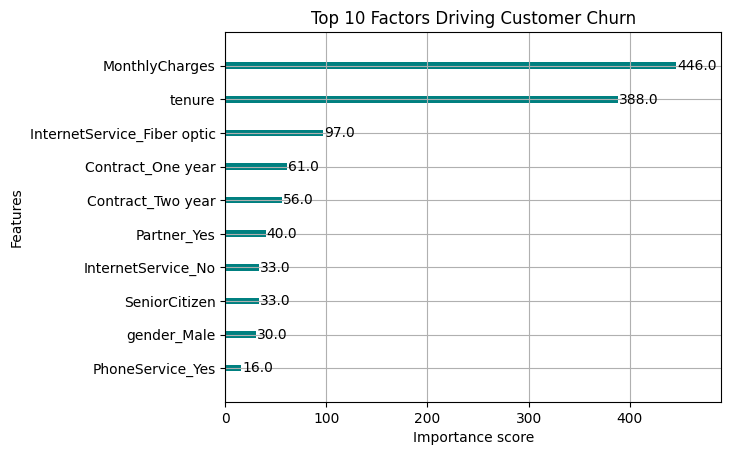

In [10]:
# Plot Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight', color='teal')
plt.title('Top 10 Factors Driving Customer Churn')
plt.show()